In [12]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap2
/Users/jinceyang/Desktop/codebase/ml/learn_d2l already in Python path


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from d2l.plot import plot

In [14]:
def f(x):
    return 3 * x**2 - 4 * x

In [15]:
for h in [10.0 ** i for i in range(-1, -6, -1)]:
    print(f'h={h: .5f}, limit={(f(1 + h) - f(1)) / h: .5f}')

h= 0.10000, limit= 2.30000
h= 0.01000, limit= 2.03000
h= 0.00100, limit= 2.00300
h= 0.00010, limit= 2.00030
h= 0.00001, limit= 2.00003


```python
def set_axes(axes: axes.Axes, 
             label: Tuple[str, str], 
             lim: Tuple[Tuple[float, float], Tuple[float, float]], 
             scale: Tuple[str, str], 
             legend: List[str]):
    (xlabel, ylabel) = label
    (xscale, yscale) = scale
    (xlim, ylim) = lim
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
```

```python
def plot(axes: axes.Axes, 
         data: Tuple[List[Any], List[Any]], 
         label: Tuple[str, str], 
         lim: Tuple[Tuple[float, float], Tuple[float, float]], 
         scale: Tuple[str, str]=('linear', 'linear'),
         legend: List[str]=[],
         fmts=('-', 'm--', 'g-.', 'r:'), 
         figsize: Tuple[float, float]=(3.5, 2.5)):

    backend_inline.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize
    (X, Y) = data
    xlabel, ylabel = label
    xlim, ylim = lim
    xscale, yscale = scale
    for (x, y, fmt) in zip(X, Y, fmts):
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)
    set_axes(axes, label, lim, scale, legend)
```

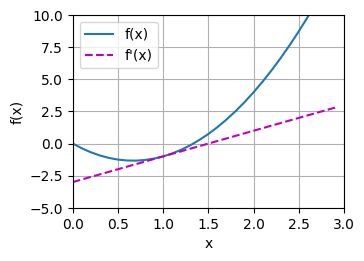

In [16]:
x = np.arange(0, 3, 0.1)
fig, ax = plt.subplots()
plot(ax, (x, [f(x), 2 * x - 3]), ('x', 'f(x)'), ((0, 3), (-5, 10)), legend=['f(x)', 'f\'(x)'])

In [17]:
def f(x):
    return x ** 3 - 1 / x

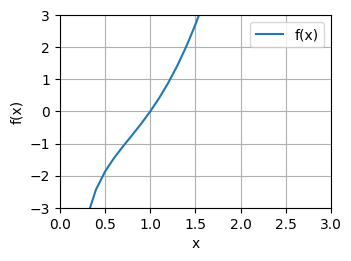

In [18]:
x = np.arange(0.1, 3, 0.1)
y = f(x)

fig, ax = plt.subplots()
plot(ax, (x, [y]), ('x', 'f(x)'), ((0, 3), (-3, 3)), legend=['f(x)'])

In [19]:
h = 0.000001
(f(1 + h) - f(1)) / h

4.000001999737712

In [20]:
def g(x1, x2):
    return 3 * x1**2 + 5 * np.exp(x2)

def grad_g(x1, x2):
    return (6 * x1, 5 * np.exp(x2))

In [21]:
g(1, 2), grad_g(1, 2)


(np.float64(39.945280494653254), (6, np.float64(36.945280494653254)))

# Exercises


## 1. 基本关系

我们知道：

$$
f^{-1}(f(x)) = x, \quad f(f^{-1}(y)) = y.
$$

把 $y = f(x)$ 代入后，就有：

$$
f^{-1}(y) = x.
$$

---

## 2. 对恒等式求导

从

$$
f(f^{-1}(y)) = y,
$$

两边对 $y$ 求导，应用链式法则：

$$
f'(f^{-1}(y)) \cdot \frac{d}{dy} f^{-1}(y) = 1.
$$

---

## 3. 解出反函数导数

于是得到：

$$
\frac{d}{dy} f^{-1}(y) = \frac{1}{f'(f^{-1}(y))}.
$$

---

## 4. 特殊说明

* 这个公式成立的前提是 $f$ 在 $f^{-1}(y)$ 处可导，且导数 $f'(f^{-1}(y)) \neq 0$，否则反函数不可微。
* 例如：

  * 若 $f(x) = e^x$，则 $f^{-1}(y) = \ln y$，其导数为 $\frac{1}{y}$，公式验证正确：$\frac{1}{f'(f^{-1}(y))} = \frac{1}{e^{\ln y}} = \frac{1}{y}$。
  * 若 $f(x) = \sin x$ 在 $[-\pi/2,\pi/2]$ 上，反函数是 $\arcsin y$，则 $(\arcsin y)' = \frac{1}{\cos(\arcsin y)} = \frac{1}{\sqrt{1-y^2}}$。

---

✅ **最终结论**：

$$
(f^{-1})'(y) = \frac{1}{f'(f^{-1}(y))}.
$$

---





## 1. 一元情况回顾

如果 $f:\mathbb{R}\to\mathbb{R}$ 可逆，那么

$$
(f^{-1})'(y) = \frac{1}{f'(f^{-1}(y))}.
$$

---

## 2. 多元函数设定

设

$$
f:\mathbb{R}^n \to \mathbb{R}^n
$$

是一个可逆、可微的函数。
它的雅可比矩阵（Jacobian）定义为

$$
J_f(\mathbf{x}) = \frac{\partial f}{\partial \mathbf{x}} \in \mathbb{R}^{n\times n}.
$$

如果 $f$ 在某点 $\mathbf{x}_0$ 的雅可比矩阵 **可逆**（即 $\det J_f(\mathbf{x}_0)\neq 0$），那么反函数 $f^{-1}$ 在点 $\mathbf{y}_0 = f(\mathbf{x}_0)$ 也是可微的。

---

## 3. 推导

我们知道：

$$
f(f^{-1}(\mathbf{y})) = \mathbf{y}.
$$

对 $\mathbf{y}$ 求导，应用链式法则：

$$
J_f(f^{-1}(\mathbf{y})) \cdot J_{f^{-1}}(\mathbf{y}) = I,
$$

其中：

* $J_f$ 是 $f$ 的雅可比矩阵；
* $J_{f^{-1}}$ 是 $f^{-1}$ 的雅可比矩阵；
* $I$ 是单位矩阵。

---

## 4. 结果

因此：

$$
J_{f^{-1}}(\mathbf{y}) = \big(J_f(f^{-1}(\mathbf{y}))\big)^{-1}.
$$

---

## 5. 小结

* 一元函数：$(f^{-1})'(y) = \dfrac{1}{f'(f^{-1}(y))}$。
* 多元函数：$\nabla f^{-1}(y)$ 的雅可比矩阵是 $\big(J_f(f^{-1}(y))\big)^{-1}$。

也就是说：**反函数的导数等于原函数导数（雅可比矩阵）的逆矩阵**。

---



---

## 例子：二维函数

定义

$$
f:\mathbb{R}^2 \to \mathbb{R}^2, \quad 
f(x,y) = \big(e^x \cos y,\ e^x \sin y\big).
$$

可以把它理解为极坐标的指数伸缩变换：

$$
f(x,y) = e^x(\cos y,\ \sin y).
$$

---

## 第一步：求 Jacobian

对 $(x,y)$ 的偏导矩阵：

$$
J_f(x,y) =
\begin{bmatrix}
\frac{\partial}{\partial x}(e^x\cos y) & \frac{\partial}{\partial y}(e^x\cos y) \\
\frac{\partial}{\partial x}(e^x\sin y) & \frac{\partial}{\partial y}(e^x\sin y)
\end{bmatrix}.
$$

逐项算：

* $\partial_x(e^x\cos y) = e^x\cos y$
* $\partial_y(e^x\cos y) = -e^x\sin y$
* $\partial_x(e^x\sin y) = e^x\sin y$
* $\partial_y(e^x\sin y) = e^x\cos y$

所以：

$$
J_f(x,y) =
\begin{bmatrix}
e^x \cos y & -e^x \sin y \\
e^x \sin y & \ \ e^x \cos y
\end{bmatrix}.
$$

---

## 第二步：计算逆函数

若 $\mathbf{z} = (u,v) = f(x,y)$，那么：

$$
u = e^x\cos y, \quad v = e^x\sin y.
$$

于是：

* 半径：$\sqrt{u^2+v^2} = e^x$ → $x = \ln \sqrt{u^2+v^2}$
* 角度：$\tan y = \tfrac{v}{u}$ → $y = \arctan\!\big(\tfrac{v}{u}\big)$

所以反函数是：

$$
f^{-1}(u,v) = \big(\ln \sqrt{u^2+v^2},\ \arctan(v/u)\big).
$$

---

## 第三步：用公式算 $J_{f^{-1}}$

我们知道：

$$
J_{f^{-1}}(u,v) = \big(J_f(f^{-1}(u,v))\big)^{-1}.
$$

也就是说，把 $(x,y) = f^{-1}(u,v)$ 代入上面的 Jacobian，然后取逆。

---

## 第四步：直接算逆矩阵

原 Jacobian：

$$
J_f(x,y) =
e^x \begin{bmatrix}
\cos y & -\sin y \\
\sin y & \ \cos y
\end{bmatrix}.
$$

注意：这个矩阵其实就是 $e^x$ 乘以旋转矩阵 $R(y)$。

* 旋转矩阵 $R(y)$ 的逆是 $R(-y) = R(y)^T$。
* 所以：

$$
(J_f(x,y))^{-1} = e^{-x} R(-y).
$$

也就是说：

$$
J_{f^{-1}}(u,v) = e^{-x}
\begin{bmatrix}
\cos(-y) & -\sin(-y) \\
\sin(-y) & \ \cos(-y)
\end{bmatrix}.
$$

代回 $x=\ln \sqrt{u^2+v^2},\ y=\arctan(v/u)$，得到：

$$
J_{f^{-1}}(u,v) = \frac{1}{\sqrt{u^2+v^2}}
\begin{bmatrix}
\cos y & \sin y \\
-\sin y & \cos y
\end{bmatrix}.
$$

---

## 总结

* 对于一元函数：反函数的导数是 $(f^{-1})'(y) = \tfrac{1}{f'(f^{-1}(y))}$。
* 对于多元函数：反函数的 Jacobian 是原函数 Jacobian 的逆：

  $$
  J_{f^{-1}}(y) = (J_f(f^{-1}(y)))^{-1}.
  $$
* 在二维例子中，$J_{f^{-1}}(u,v)$ 就是 “缩放 + 旋转矩阵”，几何意义非常直观。

---
